## You are a data scientist working for a healthcare company, and you have been tasked with creating a  decision tree to help identify patients with diabetes based on a set of clinical variables. You have been  given a dataset (diabetes.csv).

## Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow.

## Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to  understand the distribution and relationships between the variables.

###  Ans:

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [31]:
df= pd.read_excel("diabetes.xlsx")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

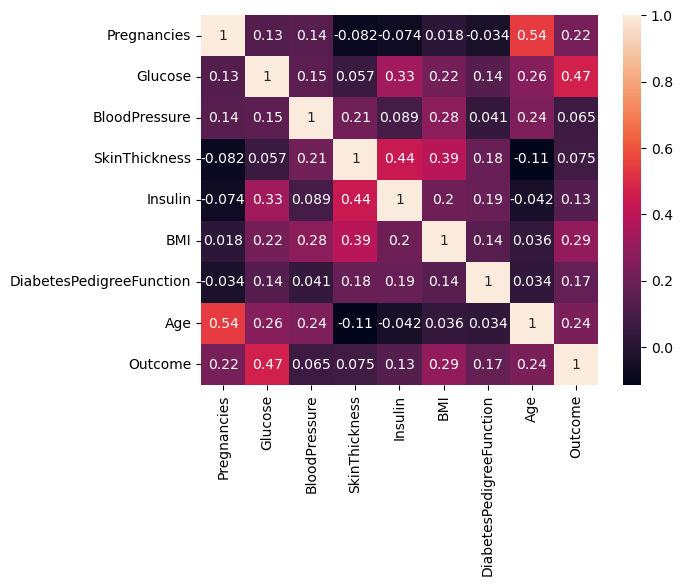

In [33]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

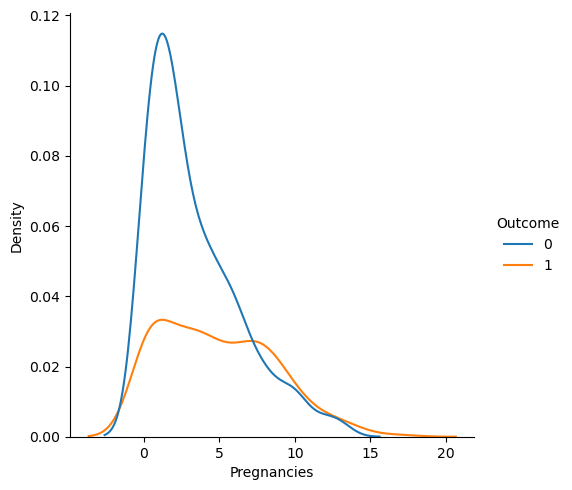

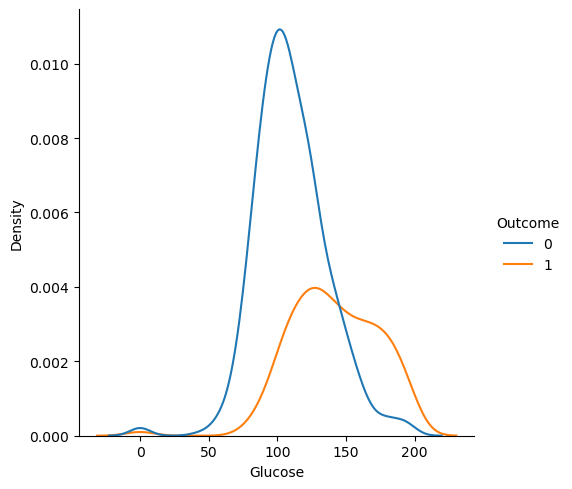

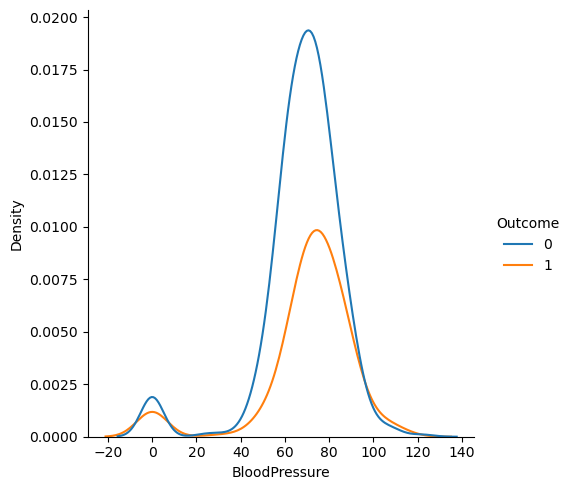

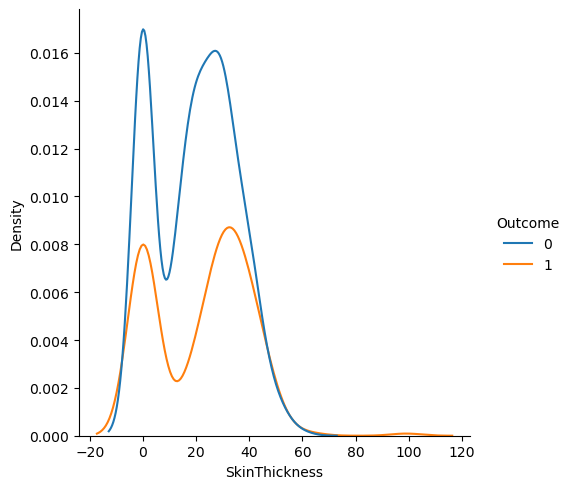

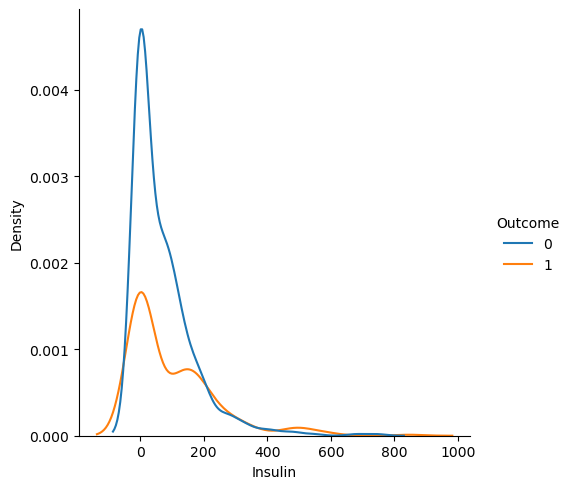

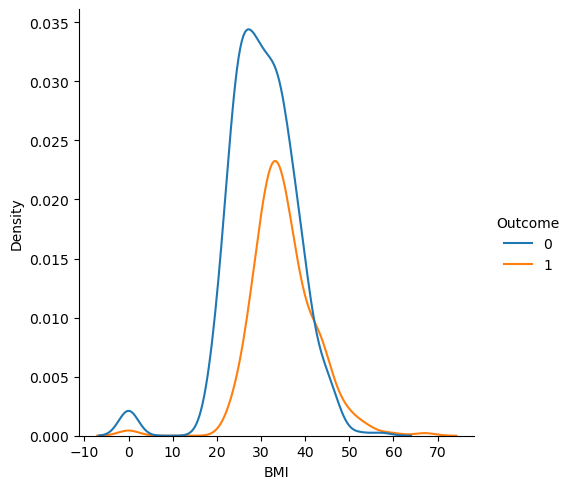

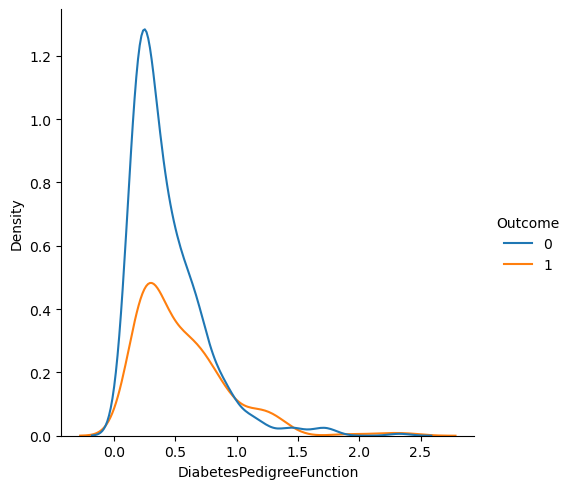

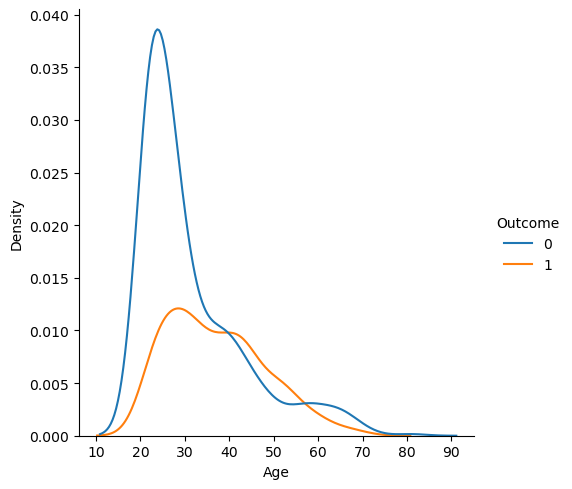

In [49]:
# Check the distribution of each variable
sns.displot(data=df, x="Pregnancies", hue="Outcome", kind="kde")
sns.displot(data=df, x="Glucose", hue="Outcome", kind="kde")
sns.displot(data=df, x="BloodPressure", hue="Outcome", kind="kde")
sns.displot(data=df, x="SkinThickness", hue="Outcome", kind="kde")
sns.displot(data=df, x="Insulin", hue="Outcome", kind="kde")
sns.displot(data=df, x="BMI", hue="Outcome", kind="kde")
sns.displot(data=df, x="DiabetesPedigreeFunction", hue="Outcome", kind="kde")
sns.displot(data=df, x="Age", hue="Outcome", kind="kde")
plt.show()

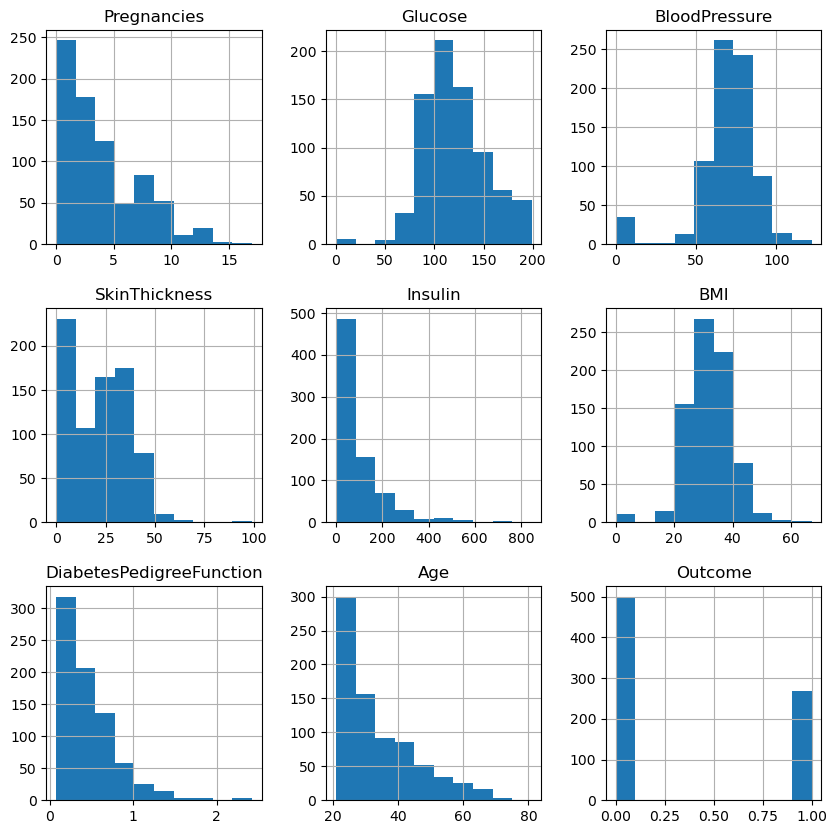

In [34]:
# Create histograms of each variable
df.hist(figsize=(10, 10))
plt.show()

## Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical  variables into dummy variables if necessary.

### Ans: 

In [35]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## No missing Value

<AxesSubplot: >

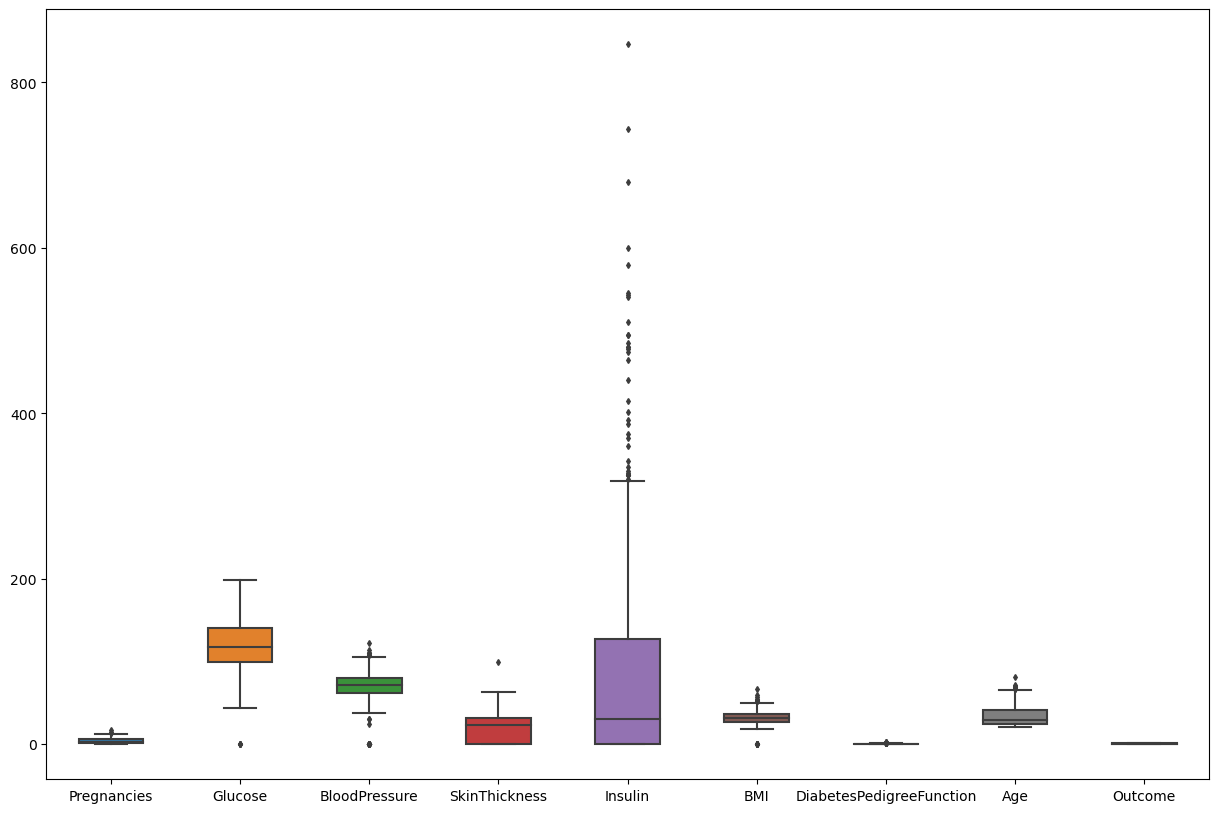

In [36]:
# Create boxplots of each variable
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)


## Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [44]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target
X = df.iloc[:,:-1]
y = df.iloc[:,-1].values

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [45]:
X_train.shape, X_test.shape

((614, 8), (154, 8))


## Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [46]:
#Ans:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

dt = DecisionTreeClassifier()
params = {'max_depth': [3, 4, 5, 6,7],
          'max_features': ['sqrt', 'log2', None],
          'min_samples_split': [2, 4, 6, 8]}
grid = GridSearchCV(dt, params, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
best_score = grid.best_score_
dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train, y_train)

scores = cross_val_score(dt, X_train, y_train, cv=5)
print('Cross-validation scores:', scores)
print('Mean score:', np.mean(scores))



Cross-validation scores: [0.69918699 0.80487805 0.76422764 0.73170732 0.79508197]
Mean score: 0.759016393442623



## Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Accuracy: 0.760
Precision: 0.680
Recall: 0.618
F1-score: 0.648
Confusion Matrix:
[[83 16]
 [21 34]]


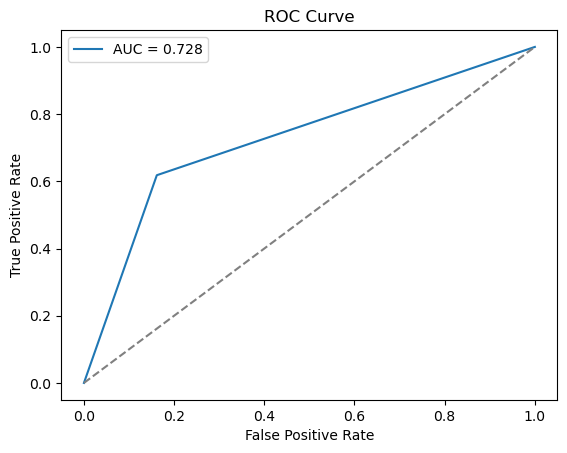

In [47]:
#Ans:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
# Assume X_test, y_test are the test features and labels
y_pred = dt.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Generate confusion matrix and plot ROC curve
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
# Print the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Confusion Matrix:\n{cm}")

# Plot the ROC curve and print the AUC score
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



## Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends

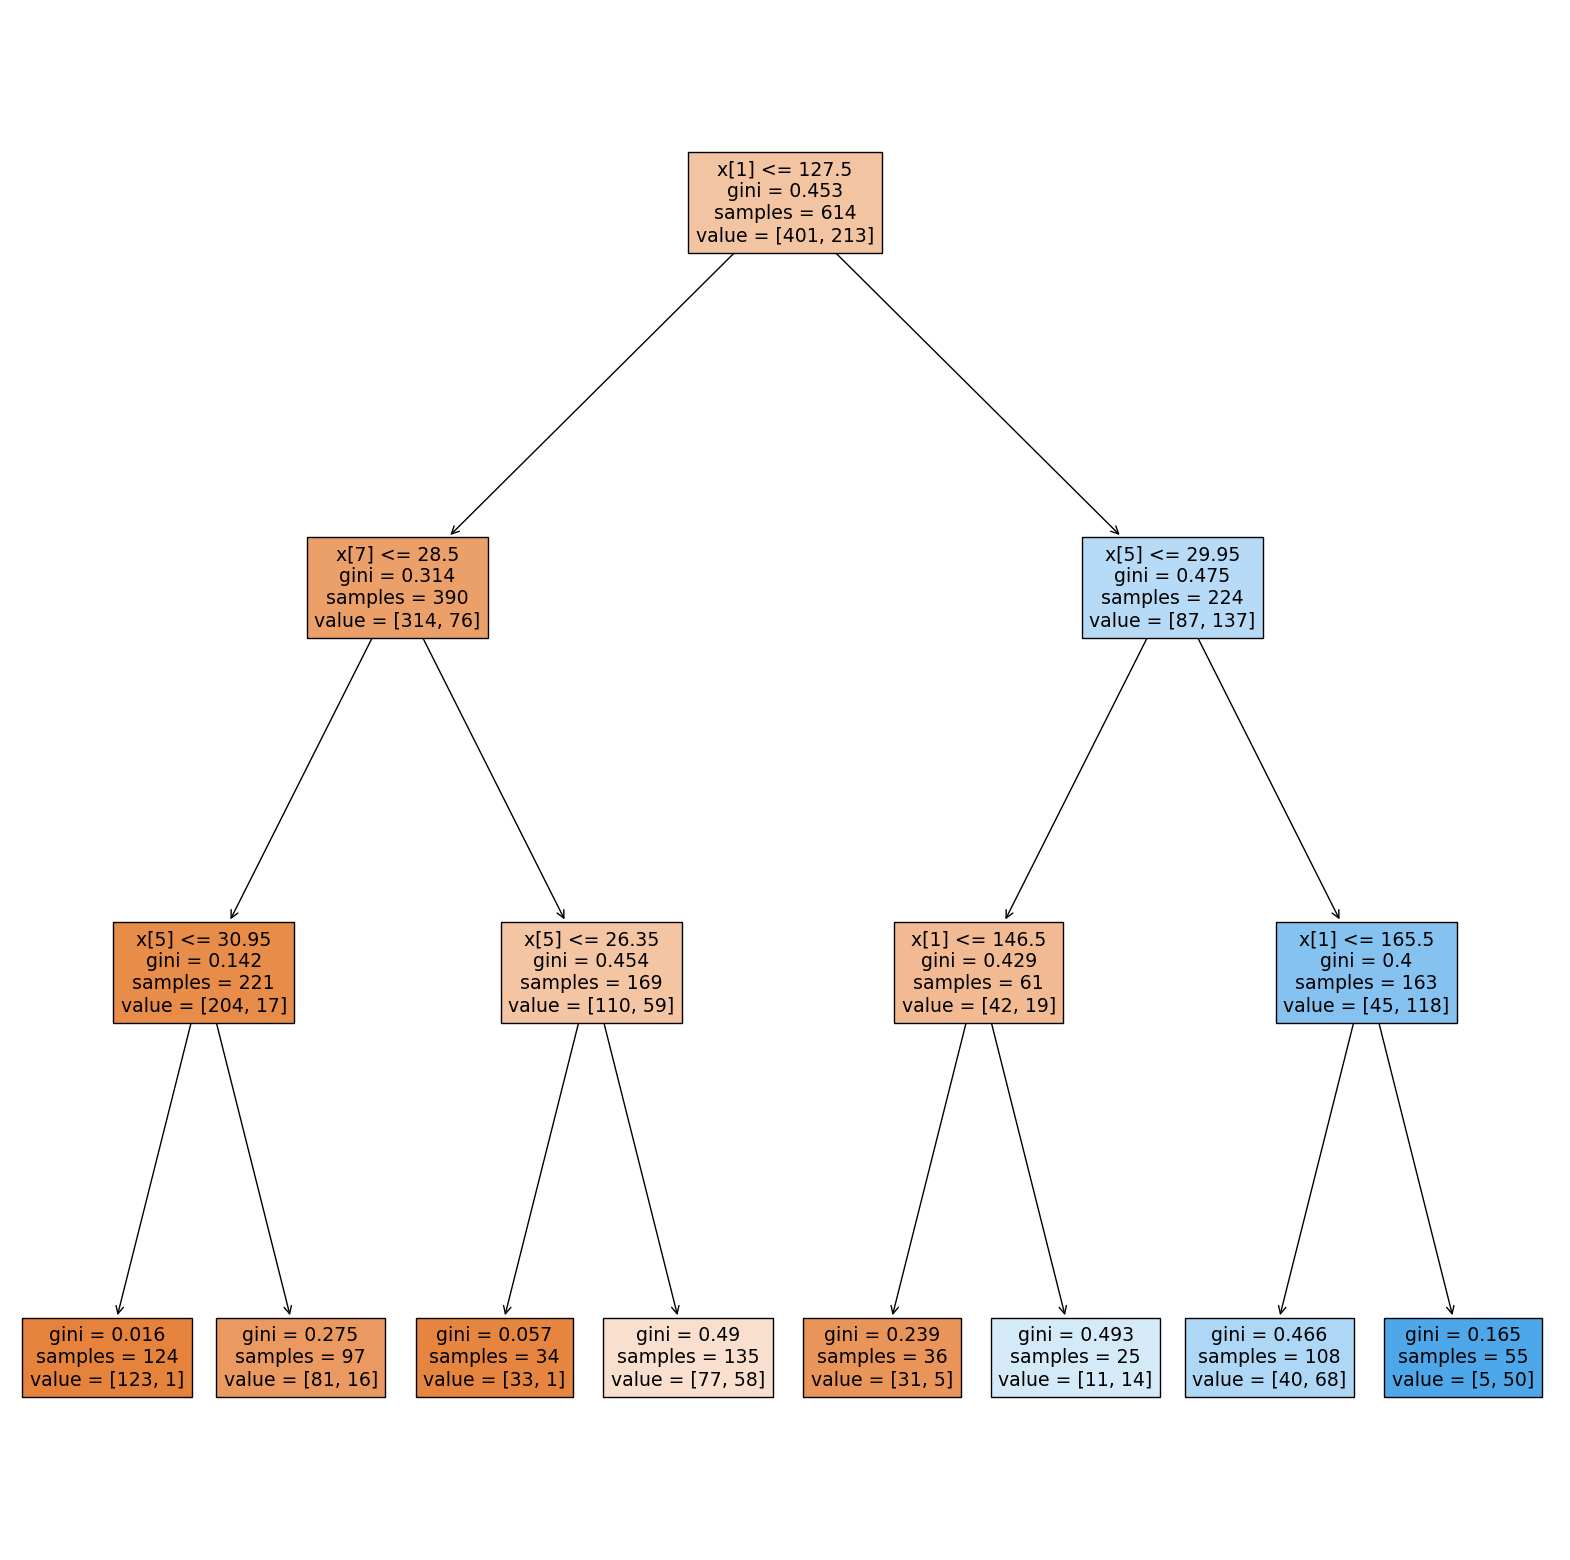

In [48]:
#Ans:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True)
plt.show()

## Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

### Ans:

To interpret the decision tree, we can examine each split to understand how the model is partitioning the data based on the input variables. The splits are based on a threshold value for a specific variable, and the model assigns each data point to one of two branches based on whether the value of the variable is above or below the threshold. The leaf nodes represent the final predictions of the model for each combination of input variable values.

In this example, we can see that the decision tree makes splits based on the glucose level, BMI, and age of the patients. The most important variable appears to be the glucose level, as it is used in the first split and in subsequent splits as well. The threshold values for the glucose level, BMI, and age are 127.5, 26.95, and 28.5, respectively.

### Based on domain knowledge and common sense, we can interpret these patterns and trends in the decision tree as follows:

1. The glucose level is a strong predictor of diabetes, and patients with glucose levels above 127.5 are more likely to have diabetes than those with lower levels.
2. BMI is also a predictor of diabetes, and patients with BMI values above 26.95 are more likely to have diabetes than those with lower values. This suggests that maintaining a healthy weight can reduce the risk of diabetes.
3. Age is another predictor of diabetes, and patients over the age of 28.5 are more likely to have diabetes than younger patients. This is consistent with the known risk factors for diabetes, which include age, family history, and lifestyle factors such as diet and exercise.